# Gender Bias in U.S. Names, 1880 through 2016

## Introduction

Gender has played a role in the personal names individuals receive after birth across a variety of continents and cultures. In western cultures, such as the one present in the United States, we typically refer to people by their given name, which is gender-specific; meaning, there is a set of names appropriate for males and a set of those appropriate for females, with a small amount of overlap between them. For instance, John is a very popular name to give boys, but it is extremely rare to find a female U.S. native who goes by John. She might be called Susan, a name which is virtually only given to girls, or Max, a name which can describe males or females.

As attitudes and values in western culture shift ever-more rapidly, so too do opinions and practices for assigning given names. Traditional names are more and more being eschewed in favor of more potentially unique or colorful ones. In this report, I plan on analyzing how relevant trends regarding these names have changed in the last 125 years. To be clear, the names from the dataset I am using are birth names, so the data in this report will reflect the popularity of naming a child for parents, and does not account for individuals who change their name later in life.

## Changes in Names Ignoring Gender

After loading the set of text files of names for a given year and counting the number of distinct names per year, I was able to generate this figure:

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'Number of Unique Names')

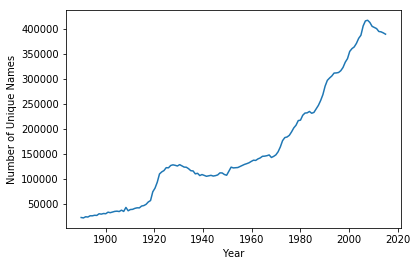

In [1]:
%pylab inline
from glob import glob
files = sorted( glob('class3_files/names/yob*.txt') )
number_names = [];
count = 0;
for file in files:
    f = open(file)
    s = f.read()
    number_names.append(len(s))    
    f.close()
    count +=1;
plt.plot(np.linspace(1890,2015,137),number_names)
plt.xlabel('Year')
plt.ylabel('Number of Unique Names')

The above plot shows that as time goes on during this period, the variety of names tends to increase. Notably, there was a sharp uptick at the beginning of the 1920s, which then went down into the 40s. This is likely due to a cultural shift during the post-war roaring 20s. This variety fell in the 30s, and seems to only pick up again following America's entry into WWII. From there on, it tends to rise until after 2000; I personally could not come up with an explanation as to why there has been a recent decrease.

## Frequency of Male versus Female Names

As stated in the Introduction, gender plays a very large part in determining the names available for a child. Luckily, the dataset that we are using separates the names by gender. Meaning, that for a given year, if some boys are named Leslie as well as some girls, there will be two separate entries for Leslie, one male and one female, with their respective number of named children of that gender. Let us see the amount of males and females named Leslie over time.

Text(0,0.5,'Number of Names Given Per Gender')

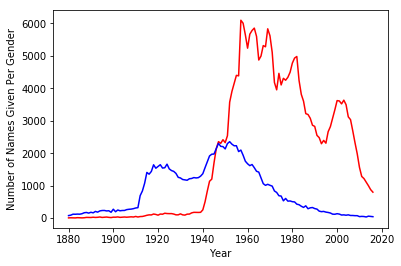

In [2]:
nyears = len(files)
def year(filename): return int(filename[-8:-4])
firstyear = year(files[0])
d = {}
gd = {'F':0,'M':1}
for file in files:
    f = open(file)
    lines = f.read().split('\n')
    for line in lines:
        if len(line)==0: continue
        name,gender,count = line.split(',')
        count = int(count)
        if name not in d:
            d[name] = zeros((2,nyears),dtype=int)
        d[name][ gd[gender], year(file)-firstyear] = count
    f.close()
name = 'Leslie'
plot( range(firstyear,year(files[-1])+1)   ,d[name][0] ,'r')
plot( range(firstyear,year(files[-1])+1)   ,d[name][1] ,'b')
plt.xlabel('Year')
plt.ylabel('Number of Names Given Per Gender')

## When the Gender Ratio Flips

Interestingly, Leslie was predominantly a name for men until the 1940s, when suddently its popularity for women began to boom. Its use by men gradually has decreased steadily since the number of women Leslie's became the majority, and while the name's use in general has declined it is still majority female. Unfortunately, while I feel as though there must be some specific circumstance which caused this, I was not able to find any relevant informtion. 

This plot was so particularly striking that I decided to investigate other occurences of a ratio switch. Towards this end, I created a list of specific instances of this event, and then printed the respective names and the sum of their instances. 

In [5]:
numyears = 137
name_switches = []
for name in d:
    if d[name][0].sum()>0 and d[name][1].sum()>0:
        for a in np.arange(136):
            if d[name][0][a] == d[name][1][a] == 0:
                break
            if (d[name][0][a]>d[name][1][a]) and d[name][0][a+1]<d[name][1][a+1]:
                    name_switches.append([name,a+1881])
            if (d[name][1][a]>d[name][0][a]) and d[name][1][a+1]<d[name][0][a+1]:
                    name_switches.append([name,a+1881])   
a = 0
n = 1
for a in np.arange(len(name_switches)-1):
    if name_switches[a][0] == name_switches[a+1][0]:
        n += 1
    else:
        print(name_switches[a][0], n)
        n = 1

Jessie 12
Ollie 3
Augusta 2
Lou 6
Marion 13
Allie 4
Jean 1
Georgie 9
Artie 3
Alpha 12
Donnie 1
Vinnie 10
Alva 18
Cleo 5
Frankie 2
Sidney 1
Jimmie 8
Patsy 2
Fay 1
Claudie 9
Clemmie 10
Joan 1
Nevada 11
Beryl 2
Lennie 3
Mallie 6
Bird 5
Tommie 12
Vernie 8
Dell 11
Donie 5
Oda 2
Vada 2
Leslie 1
Ocie 13
Osie 6
Shirley 3
Theo 12
Ara 11
Arrie 2
Augustine 5
Byrd 10
Carey 9
Dee 6
Lacy 9
Merle 2
Sammie 1
Clair 1
Guadalupe 2
Isa 7
Lynn 1
Ottie 8
Charlie 1
Charley 1
Harley 1
Monroe 3
Emery 3
Riley 1
Emory 3
Taylor 1
Morgan 1
Elisha 2
Elza 2
Emerson 1
Loren 1
Aubrey 1
Addison 1
Merritt 20
Sandy 1
Cary 2
Jules 5
Smith 2
Raleigh 1
Merrill 7
Bailey 1
Dana 14
Pat 4
Sol 8
Sydney 5
Lindsey 3
Verne 4
Valentine 5
Avery 1
Odie 14
Shelby 1
Gene 2
Hollis 3
Lonie 22


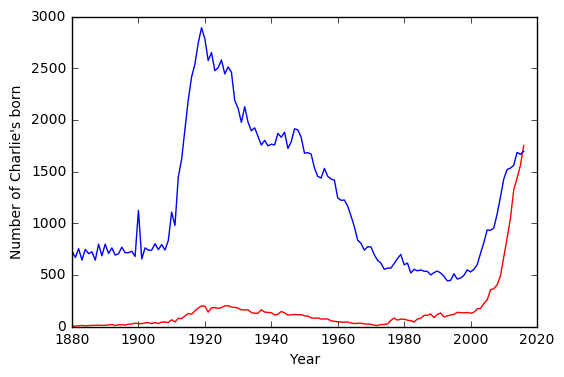

In [94]:
name = 'Charlie'
plot( range(firstyear,year(files[-1])+1)   ,d[name][0] ,'r')
plot( range(firstyear,year(files[-1])+1)   ,d[name][1] ,'b')
plt.xlabel('Year')
plt.ylabel('Number of '+name+"'s born")

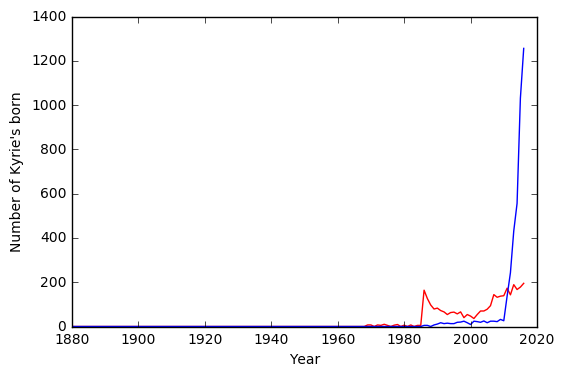

In [95]:
name = 'Kyrie'
plot( range(firstyear,year(files[-1])+1)   ,d[name][0] ,'r')
plot( range(firstyear,year(files[-1])+1)   ,d[name][1] ,'b')
plt.xlabel('Year')
plt.ylabel('Number of '+name+"'s born")

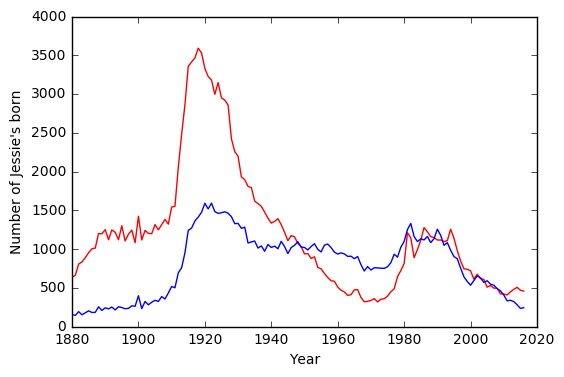

In [96]:
name = 'Jessie'
plot( range(firstyear,year(files[-1])+1)   ,d[name][0] ,'r')
plot( range(firstyear,year(files[-1])+1)   ,d[name][1] ,'b')
plt.xlabel('Year')
plt.ylabel('Number of '+name+"'s born")

Text(0,0.5,"Number of James's born")

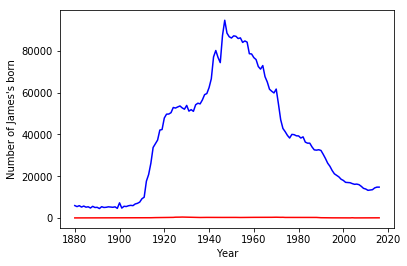

In [3]:
name = 'James'
plot( range(firstyear,year(files[-1])+1)   ,d[name][0] ,'r')
plot( range(firstyear,year(files[-1])+1)   ,d[name][1] ,'b')
plt.xlabel('Year')
plt.ylabel('Number of '+name+"'s born")

Text(0,0.5,"Number of John's born")

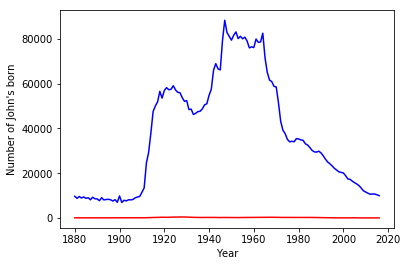

In [4]:
name = 'John'
plot( range(firstyear,year(files[-1])+1)   ,d[name][0] ,'r')
plot( range(firstyear,year(files[-1])+1)   ,d[name][1] ,'b')
plt.xlabel('Year')
plt.ylabel('Number of '+name+"'s born")

My roommate and I also decided to see the gender distribution for our names. Interestingly, we found that the trends for our names' popularities mirrored each other very closely. I'm attributing this to our names being typical Western European Christian names, and the fact that they both start with the same letter and have one syllable.

## Conclusion

I was fairly unsurprised by the obvious fact that an individual's gender affects their name. I was surprised by the oddity of trends, and the naming "fads" which we are undergoing today. For example, in class we saw how the name "Bella" ballooned in popularity for girls, and in one of the above plots you can see that the popularity of "Kyrie" exploded in recent years, almost definitely as a result of the popular NBA point guard Kyrie Irving. This fickleness appears to be more of a recent phenomena with the advent of the celebrity; perhaps in years to come, clusters of indviduals of the same gender and age might have a more skewed distribution than in years past. 